In [1]:
import os
os.chdir("..")

In [2]:
# Are we in parent dir?
assert "visuals" in os.listdir()

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
import geodatasets
from collections import Counter
import matplotlib as mpl

## Load data

In [50]:
df = pd.read_excel("data/edgelist/UN_full.xlsx")

In [65]:
df_class = pd.read_csv("data/classifications/3classes.csv")
df_class.columns = ["Country", "Embedding"]
df_class.groupby("Embedding").size()

Embedding
0    95
1    55
2    76
dtype: int64

In [66]:
code2emb = {k:v for k, v in df_class.values}
nodes = df_class["Country"].values

In [67]:
# Data from online ressource
country_data = gpd.read_file("data/metadata_country/ne_50m_admin_0_countries.geojson")
country_data = country_data.merge(df_class, right_on="Country", left_on="adm0_a3", how="left")

## Merging geodata and classifications

In [75]:
country_data["Embedding"] = country_data["Embedding"].fillna(999)

In [69]:
centroid_pos = country_data.centroid.to_crs(country_data.crs)

C:\Users\nikol\AppData\Local\Temp\ipykernel_13844\2356846752.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_pos = country_data.centroid.to_crs(country_data.crs)


In [76]:
cmap = mpl.colormaps["Set2"]
colors = []
for emb in country_data["Embedding"]:
    if emb != 999:
        colors.append(cmap(int(emb)))
    else:
        colors.append(cmap(8))

<Axes: >

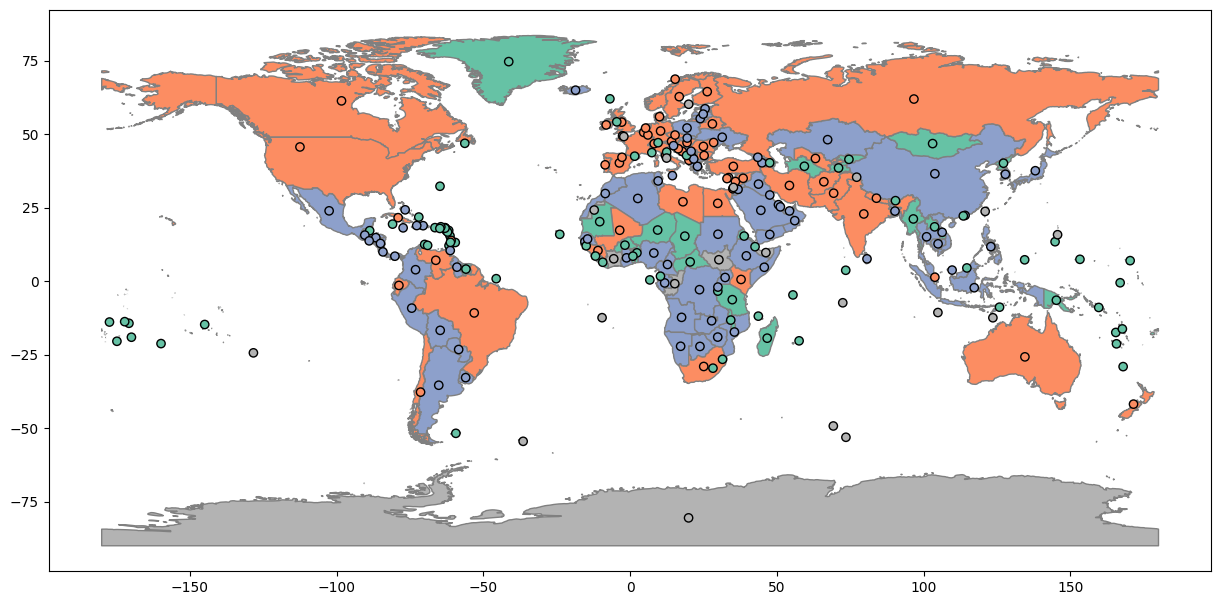

In [77]:
fig, ax = plt.subplots(figsize=(15,15))
country_data.plot(ax=ax, legend=True, color=colors, edgecolor="grey")
centroid_pos.plot(ax=ax, color = colors, edgecolor="black")

<Axes: >

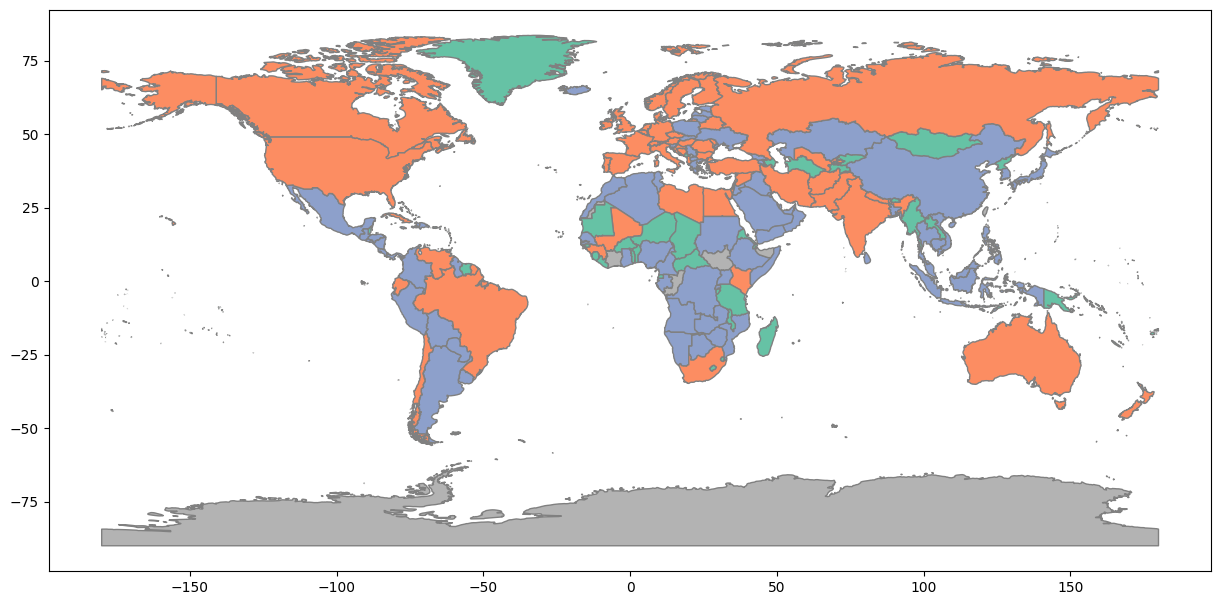

In [78]:
fig, ax = plt.subplots(figsize=(15,15))
country_data.plot(ax=ax, legend=True, color=colors, edgecolor="grey")